In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read a CSV file into a DataFrame
# change the path to the location of the data files
applicants_2nd = pd.read_csv('../raw_data/2ndBatch_Applicants.csv', encoding='latin1',)
# Display the first few rows of each DataFrame
print("Applicants Data:")
print(applicants_2nd.head())
combined_2ndBatch = pd.read_csv('../combined_and_clean_data/2ndBatch_Combined.csv')
print("\nAccepted Data:")
print(combined_2ndBatch.head())

Applicants Data:
     Student ID            Age           Location Highest Education Entranced  \
0  GED202402_01             18  Thailand (Others)    Pass 9th Grade       Yes   
1  GED202402_02             17           Mandalay   Pass 10th Grade        No   
2  GED202402_03  22 years old              Yangon   Pass 10th Grade        No   
3  GED202402_04             19                Mon             Other        No   
4  GED202402_05             16             Yangon   Pass 10th Grade        No   

  Specilization in High School                  Current Job/School  
0                      Biology                 ???????????????????  
1             ????-? (Biology)                                 NGM  
2   English major (First year)                   Freelance Teacher  
3                       ??????                                ????  
4          I passed 10th Grade  I'm learning Computer basic course  

Accepted Data:
     Student ID  Age  Gender  Location Highest Education Entranced


Acceptance Summary:
              Location  Total Applicants  Total Accepted  Acceptance Rate
0           Ayeyarwady                 2             0.0         0.000000
1                 Bago                 2             0.0         0.000000
2                 Chin                 1             0.0         0.000000
3               Kachin                 5             2.0        40.000000
4                Kayin                 6             2.0        33.333333
5               Magway                 4             3.0        75.000000
6             Mandalay                17             5.0        29.411765
7                  Mon                 6             4.0        66.666667
8              Sagaing                 7             2.0        28.571429
9                 Shan                 7             3.0        42.857143
10          Taninthary                 3             1.0        33.333333
11  Thailand (Mae Sot)                 3             0.0         0.000000
12   Thailand (Ot

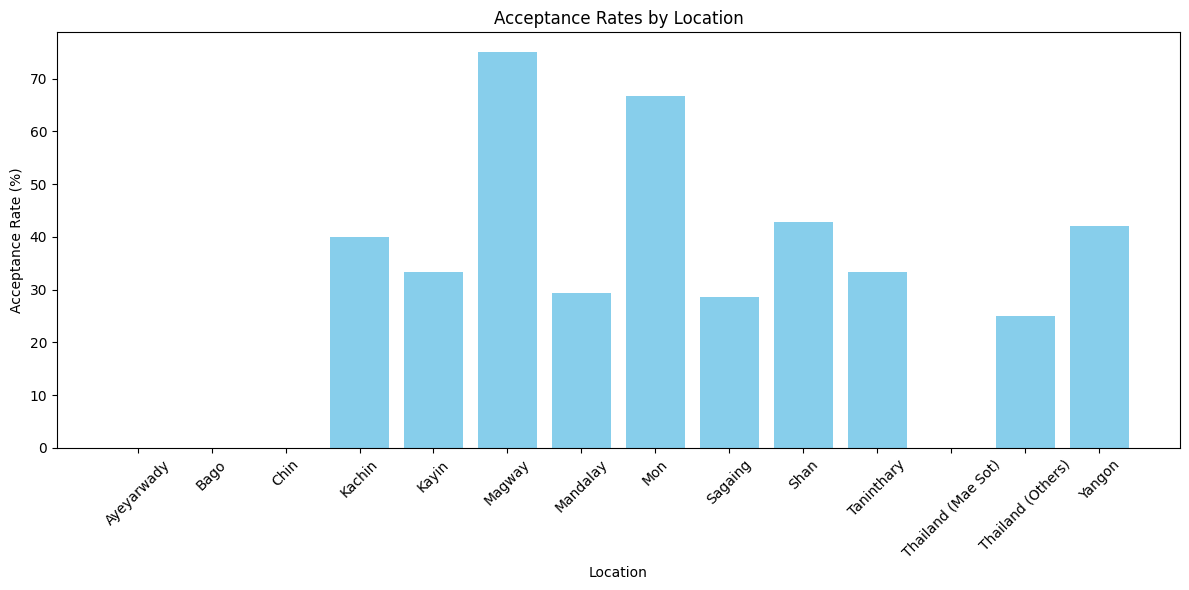

In [2]:
# Count the total number of applicants by location
applicant_counts = applicants_2nd.groupby('Location').size().reset_index(name='Total Applicants')

# Count the number of accepted students by location
accepted_counts = combined_2ndBatch.groupby('Location').size().reset_index(name='Total Accepted')

# Merge the two DataFrames on Location
acceptance_summary = pd.merge(applicant_counts, accepted_counts, on='Location', how='left').fillna(0)

# Calculate acceptance rates
acceptance_summary['Acceptance Rate'] = (acceptance_summary['Total Accepted'] / acceptance_summary['Total Applicants']) * 100

# Display the acceptance summary
print("\nAcceptance Summary:")
print(acceptance_summary)

# Plotting the acceptance rates by location
plt.figure(figsize=(12, 6))
plt.bar(acceptance_summary['Location'], acceptance_summary['Acceptance Rate'], color='skyblue')
plt.title('Acceptance Rates by Location')
plt.xlabel('Location')
plt.ylabel('Acceptance Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Acceptance Summary:
              Location  Total Applicants  Total Accepted  Acceptance Rate
12          Ayeyarwady                 2             0.0         0.000000
13                Chin                 1             0.0         0.000000
11                Bago                 2             0.0         0.000000
9   Thailand (Mae Sot)                 3             0.0         0.000000
7    Thailand (Others)                 4             1.0        25.000000
2              Sagaing                 7             2.0        28.571429
1             Mandalay                17             5.0        29.411765
5                Kayin                 6             2.0        33.333333
10          Taninthary                 3             1.0        33.333333
6               Kachin                 5             2.0        40.000000
0               Yangon                38            16.0        42.105263
3                 Shan                 7             3.0        42.857143
4                

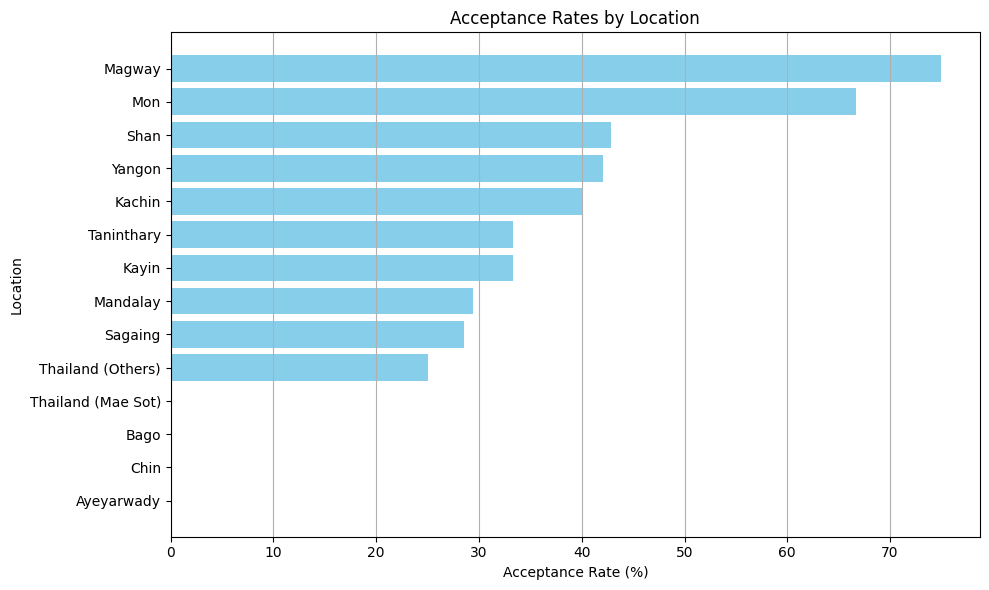

In [3]:
import pickle #for dataCombination in another notebook
# Step 1: Count total applicants by location
total_applicants = applicants_2nd['Location'].value_counts().reset_index()
total_applicants.columns = ['Location', 'Total Applicants']

# Step 2: Merge accepted DataFrame with applicants to check for accepted students by location
accepted_by_location = combined_2ndBatch.merge(applicants_2nd[['Student ID', 'Location']], on='Student ID', how='inner')
# Now, we can choose to rename columns for clarity
accepted_by_location.rename(columns={'Location_x': 'Location', 'Location_y': 'Location (from Applicants)'}, inplace=True)
# Count accepted students by location
accepted_counts = accepted_by_location['Location'].value_counts().reset_index()
accepted_counts.columns = ['Location', 'Total Accepted']

# Step 3: Merge totals and accepted counts
acceptance_summary2 = pd.merge(total_applicants, accepted_counts, on='Location', how='left').fillna(0)

# Step 4: Calculate acceptance rates
acceptance_summary2['Acceptance Rate'] = (acceptance_summary2['Total Accepted'] / acceptance_summary2['Total Applicants']) * 100

# Sort by Acceptance Rate in descending order
acceptance_summary2.sort_values(by='Acceptance Rate', ascending=True, inplace=True)
# Save the DataFrame using pickle
with open('acceptance_summary2.pkl', 'wb') as f:
    pickle.dump(acceptance_summary2, f)


# Display acceptance summary
print("\nAcceptance Summary:")
print(acceptance_summary2)

# Step 5: Visualization as a horizontal bar graph
plt.figure(figsize=(10, 6))
plt.barh(acceptance_summary2['Location'], acceptance_summary2['Acceptance Rate'], color='skyblue')
plt.title('Acceptance Rates by Location')
plt.xlabel('Acceptance Rate (%)')
plt.ylabel('Location')
plt.grid(axis='x')  # Optional: Add gridlines for better readability
plt.tight_layout()
plt.show()


Location
Yangon               16
Mandalay              5
Mon                   4
Shan                  3
Magway                3
Kachin                2
Sagaing               2
Kayin                 2
Thailand (Others)     1
Taninthary            1
Name: count, dtype: int64
The selection is diverse across regions.


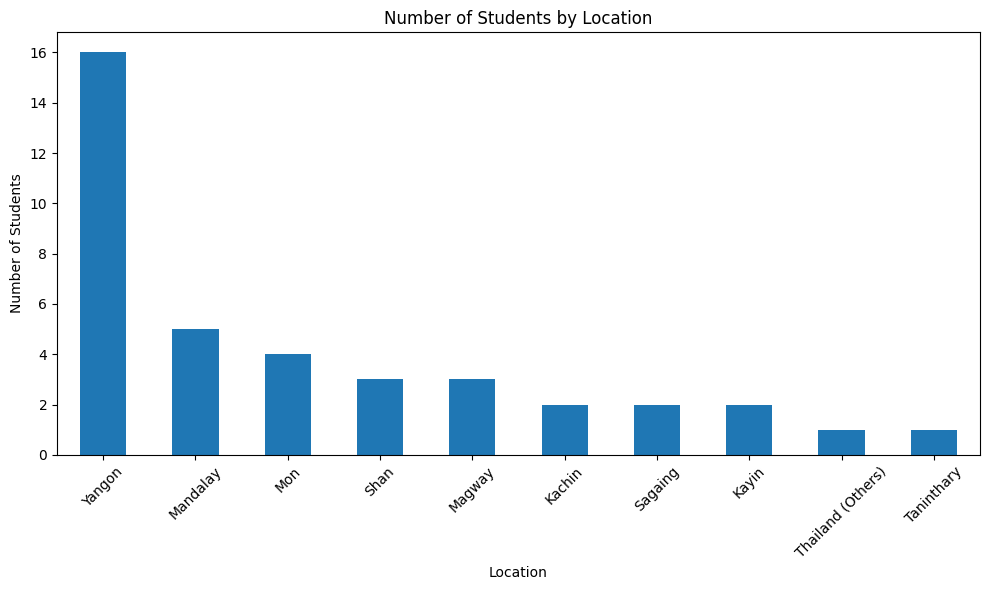

In [4]:

# Count the number of students in each location
location_counts = combined_2ndBatch['Location'].value_counts()

# Display the counts
print(location_counts)

# Check if the selection is focused on one region
if location_counts.max() > (len(combined_2ndBatch) / 2):
    print("The selection is focused on one region.")
else:
    print("The selection is diverse across regions.")

# Optional: Visualize the distribution of students by location
plt.figure(figsize=(10, 6))
location_counts.plot(kind='bar')
plt.title('Number of Students by Location')
plt.xlabel('Location')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


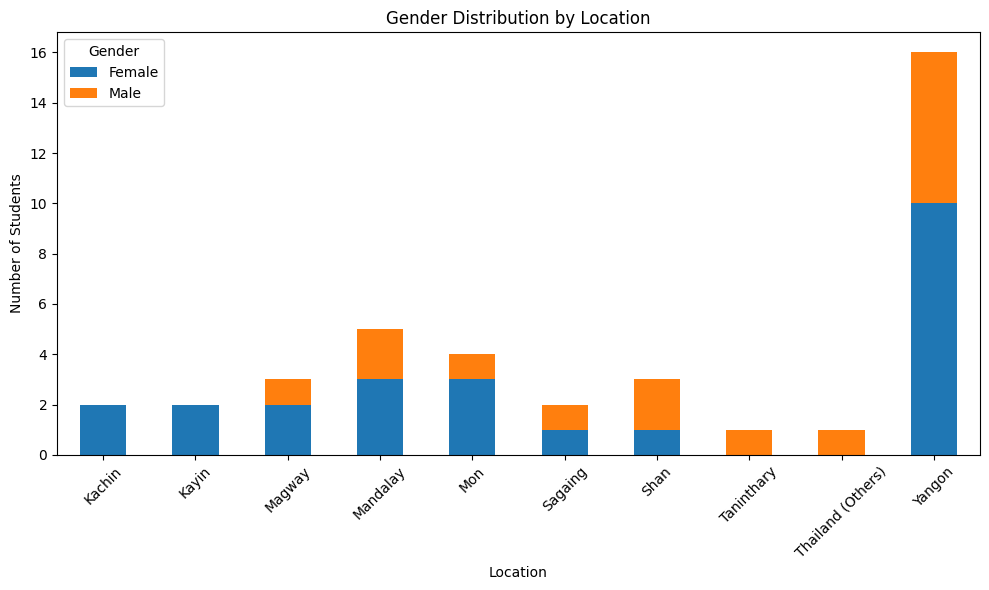

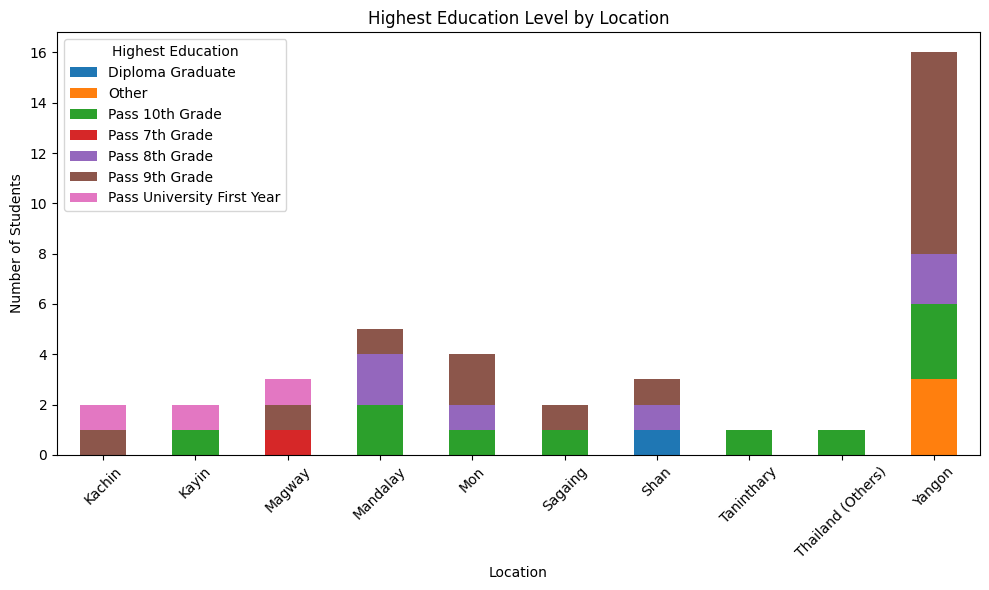

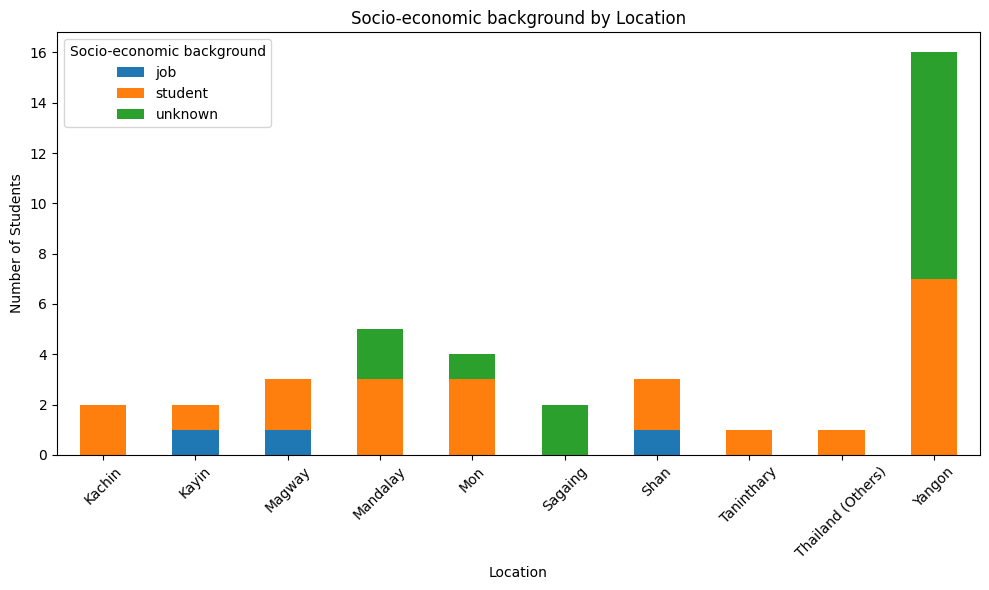

In [5]:
# 1. Gender Distribution by Location
gender_location = combined_2ndBatch.groupby(['Location', 'Gender']).size().unstack()
gender_location.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Gender Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# 2. Highest Education Level by Location
education_location = combined_2ndBatch.groupby(['Location', 'Highest Education']).size().unstack()
education_location.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Highest Education Level by Location')
plt.xlabel('Location')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title='Highest Education')
plt.tight_layout()
plt.show()

# 3. Socio-economic background Analysis
job_location = combined_2ndBatch.groupby(['Location', 'Socio-economic background']).size().unstack()
job_location.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Socio-economic background by Location')
plt.xlabel('Location')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title='Socio-economic background')
plt.tight_layout()
plt.show()
